# Проект по анализу успешности игр
_____
**Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)**
    
_____
**Цель - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**  
_____
**1- Предобработка данных**

**2- Исследовательский анализ данных и визуализация данных**

**3- Составить портрет пользователя каждого региона**

**4- Проверка некоторых гипотез с помощью t-test**

**5- Составить ообщий вывод и дать рекомендации**
_____
**Исходные данные.**
    
*название игры*

*платформа*

*год выпуска*

*жанр игры*

*продажи в Северной Америке*

*продажи в Европе*

*продажи в Японии*

*оценка критиков*

*оценка пользователей*

*рейтинг от организации ESRB*

##  Шаг. Чтение данных и информации о них

In [6]:
#импортируем нужные библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

In [2]:
#прочитаем файл
df = pd.read_csv('/datasets/games.csv')

In [3]:
#посмотрим первые 10 строк
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных**

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [4]:
#посмотрим общую информацию о таблице,количество дубликатов и кол-во строк
df.info()
print('Дублитов:',df.duplicated().sum())
print('Количество строк:',df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Дублитов: 0
Количество строк: 16715


In [5]:
#Посмотрим на неявное количество дубликат
df[df.duplicated(subset=['Name','Platform'],keep='first')]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [6]:
df=df.drop_duplicates(subset=['Name','Platform'],keep='first').reset_index(drop=True)

In [7]:
#проверим,исходное значение(16715-строк)
df.shape[0]

16710

In [8]:
#посмотрим отдельно на user_score тип файлов Object
df['User_Score'].sample(10)

13009    tbd
14064    NaN
7219     NaN
13161    NaN
2491     8.2
12274    tbd
11202    5.2
1709     7.9
5766     tbd
10820      5
Name: User_Score, dtype: object

In [9]:
#отсортируем все значения по возрастанию
df['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [10]:
#посмотрим количество пропусков на тепловом столбце
df.isna().sum()
pd.DataFrame(df.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
Name,0.0
Platform,0.0
Year_of_Release,1.6
Genre,0.0
NA_sales,0.0
EU_sales,0.0
JP_sales,0.0
Other_sales,0.0
Critic_Score,51.3
User_Score,40.1


In [11]:
# применим метод describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16442.0,2006.484856,5.876498,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16710.0,0.263396,0.813695,0.0,0.0,0.08,0.24,41.36
EU_sales,16710.0,0.145062,0.503404,0.0,0.0,0.02,0.11,28.96
JP_sales,16710.0,0.077637,0.308897,0.0,0.0,0.00,0.04,10.22
Other_sales,16710.0,0.047349,0.186757,0.0,0.0,0.01,0.03,10.57
Critic_Score,8133.0,68.965818,13.936131,13.0,60.0,71.00,79.00,98.00


**ВЫВОД:**

На первом шаге анализа,были импортировны библиотеки,просмотрен первые 10 строк дф, а так же была просмотрена общая информация о нем и составлено описание предоставленных данных

Данный датафрейм имеет 16715 строк,10 столбцов и количество дубликтов 0.

**Что нужно исправить**

В шаге **№2** нужно внести измениния в датафрейм,а именно:

**1-** Привести название столбцов к нижнему регистру(all)

**2-** Изменить тип в данных в (**Year_of_Release** из **float** в **int** ,**User_Scrore** object в **числовые**)

**3-** Так же в **User_Scrore** замечено значение **TBD**- разобраться что это!

**4** Замечены пропуски в **Year_of_Release** ,**Critic_Score** , **User_Score**, **Rating**.Заменить по возможност




In [12]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16705,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16706,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16707,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Шаг. Подготовка данных

### Нижний регистр

In [13]:
df.columns=df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16705,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16706,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16707,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Преобразование типов данных

In [14]:
# year_of_release
df['year_of_release']=df['year_of_release'].astype(pd.Int32Dtype())
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16705    2016
16706    2006
16707    2016
16708    2003
16709    2016
Name: year_of_release, Length: 16710, dtype: Int32

TBD- **To Be Determined** , то есть "Будет определено".Тогда значение **tbd** заменим на **NaN**,а после перевдем в формат **float**

In [15]:
#замена тбд
df.loc[df['user_score']=='tbd','user_score']=np.NaN
#преобразование 
df['user_score']=df['user_score'].astype('float32')
# проверка
df['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan], dtype=float32)

### Пропуски

In [16]:
df.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

В ходе дополнительной проверки на пропуски были выявлены пропуски в **name** и **genre** в количестве 2 строк(в каждой)

In [17]:
#посмотрим отдельно на пропуски в name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [18]:
#посмотрим отдельно на пропуски в genre
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [19]:
# удалим  строки,так как номер строк одинаковый удалять будет из любой из колнок name или genre
df=df.dropna(subset=['name'])

In [20]:
# проверка
df.isna().sum()

name                  0
platform              0
year_of_release     268
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [21]:
df=df.dropna(subset=['year_of_release'])

Данные в **year_of_release** - были удалены,после выполенения всего иследования,так как 269 строк,никак не повлияли на наше иследование

**critic_score, user_score**-Трогать не будем,так как потеряем большой объем  данных,ну заполнить их нечем.Так как это идивидуальные оценки критиков и пользователей,мы не можем заполнять их ни медианным ни средним - это исказит наш прогноз

**rating** - заполним значением **unknown**,в ходе иследование было установлено,что прпоуски в этих значениях связаны организацие которая,выставляет рейтинг игры,в Японии этим занимается другая организация,а значительная часть прпусков находятся в японском сегменте

In [22]:
df['rating']=df['rating'].fillna('unknown')
df['rating'].value_counts()

unknown    6676
E          3920
T          2903
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

### Рассчет суммарных продаж по всем регионам

In [23]:
df['sum_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].apply(sum,axis=1)
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14843,Brothers Conflict: Passion Pink,PSP,2012,Action,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
8711,Mugen Souls,PS3,2012,Role-Playing,0.04,0.02,0.08,0.01,55.0,7.3,T,0.15
10889,X-COM: UFO Defense,PS,1995,Strategy,0.05,0.04,0.00,0.01,NaN,NaN,unknown,0.10
9176,Odin Sphere: Leifthrasir,PSV,2016,Role-Playing,0.02,0.02,0.09,0.01,93.0,7.9,T,0.14
1562,Jillian Michaels' Fitness Ultimatum 2009,Wii,2008,Sports,0.96,0.20,0.00,0.11,30.0,2.0,E,1.27
9210,Eragon,X360,2006,Action,0.12,0.01,0.00,0.01,48.0,5.7,T,0.14
7624,Front Mission Evolved,X360,2010,Shooter,0.10,0.07,0.02,0.02,58.0,6.1,T,0.21
848,Fire Emblem: Awakening,3DS,2012,Role-Playing,0.90,0.45,0.54,0.13,92.0,9.1,T,2.02
16004,Sengoku Efuda Yuugi: Hototogisu Ran,PSP,2008,Misc,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02
15743,Tail of the Sun,PS,1996,Role-Playing,0.01,0.01,0.00,0.00,NaN,NaN,unknown,0.02


**Вывод**

В ходе подгтовки данных были выполнены следующие действия:

Все колонки приведены к нижнему регистру

Преобразованы типы данных в колнках **year_of_release** и **user_score** (int & float соответсвенно)

Заменены значения tbd на NaN

Удалены 2 строки с номерами(659,14244) так как информации в них крацне мало,и их удаление не повлияет на иследование

Пропуски в **year_of_release, critic_score, user_score** запонить нечем-оставим все как есть

Пропуски в **rating** заменены на unknow

В датафрейм добавлена колонка с рассчетом сумарных значений по всем регионам

## Шаг. Исследовательский анализ данных

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

### Количество выпуска игр в разные годы

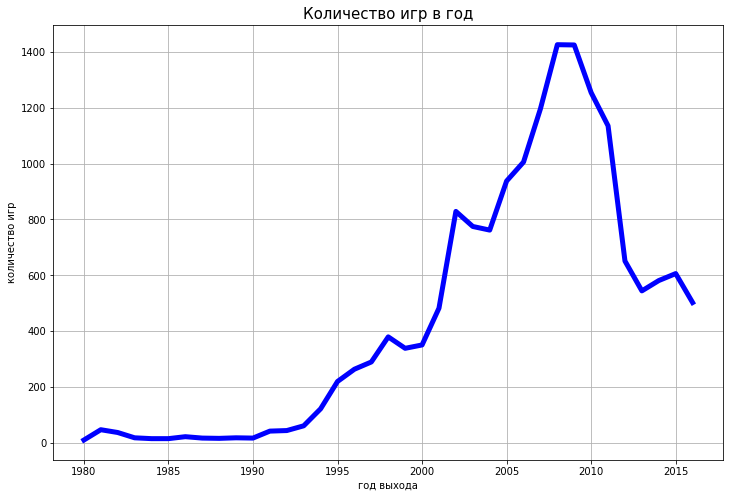

In [24]:
game_year=(df.pivot_table(index ='year_of_release',
                     values='name',
                     aggfunc='count').
    plot(color='blue',
         linewidth=5,
         grid=True,
         figsize=(12,8),
         legend=False))
game_year.set(ylabel='количество игр',
       xlabel='год выхода')
game_year.set_title('Количество игр в год',fontsize=15)
plt.show;

С 1980 по 1990 количество игр можно посчитать по пальцам на руке,думаю это связанно с тем,что такая индуристия как видео игры только начанала свой путь

Начиная с 1995 года и до 2008 данная индустрия начала развиваться и преодалела отметку в 1440ед,начиная с 2000 года видно резкий подъем

После 2009 года наблюдается такой же резкий спад,к 2015 количество выпускаемых игра упало до 600ед

Препологаю что рост и упадок в индустрии связан с ростом молодых компаний стремящихся занять данную нишу в числе первых
Но со временем росла конкуренция,и вытесняла слабых разработчиков.Что привело к упадку роста игр,но улучшила их качество

Считаю что данные за весь период не важны,лучше взять отметку с 1995 года,так как рост начался примерно оттуда,но более точную дату  определим в следуищих шагах

In [25]:
#попробуем поискать дубликаты по годам и названию,посмотрим как повоияет это на наш график
#Вынесем в отдльный ДФ,поиграемся с данными в нем
df_dupl=df[df.duplicated(subset=['year_of_release','name'],keep='first')]
df_dupl

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
55,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M,10.61
...,...,...,...,...,...,...,...,...,...,...,...,...
16687,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16704,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16705,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16708,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [26]:
df_dupl=df_dupl.drop_duplicates(subset=['year_of_release','name'],keep='first').reset_index(drop=True)

In [27]:
df_dupl.shape[0]

2333

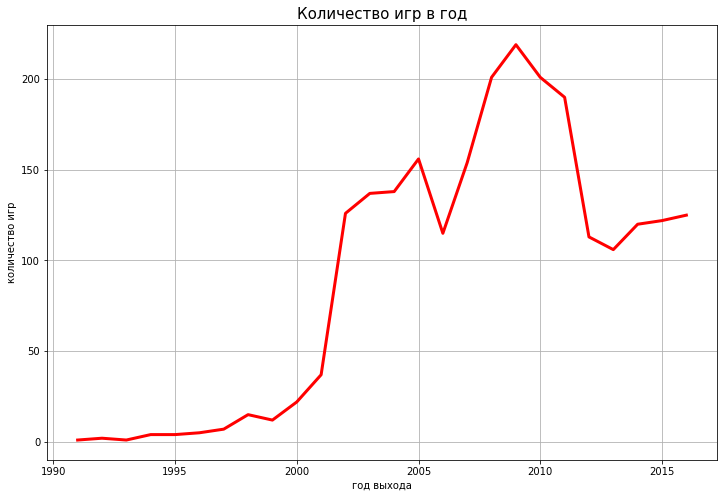

In [28]:
game_year=(df_dupl.pivot_table(index ='year_of_release',
                     values='name',
                     aggfunc='count').
    plot(color='red',
         linewidth=3,
         grid=True,
         figsize=(12,8),
         legend=False))
game_year.set(ylabel='количество игр',
       xlabel='год выхода')
game_year.set_title('Количество игр в год',fontsize=15)
plt.show;

В целом суть графика не изменилась,но видно что начиная примерно с 1999 года идет резкий рост игр.Считаю это связано с тем,что начиная 1999 года стали выходить революционные игры по типу Quake3,Half-Life,War-Craft 3,Max-Payne,Mafia и т д.

Если уж совсем вдваться в детали,то  в 1993 году вышела такая игра как DOOM,на сколько мне известно на то время это "снесло головы" многим.И как раз,исходя из нашего графика видно,что это скорее и послужило основным толчком в игровой индустрии

В 2005 году количество уникальных игр составило примерно 160 ед,после произошле спад.Как помню я,игры плохо обновлялись в плане движков,все уже считалось устаревшим,все ждали новый движок от Cryengine - игра называлась Crysis как раз видно второй толчок в индустри

Далее рынок игр стал падать,но мое мнение не изменилось исходя из первого графика)Слабые компании уходят,сильные остатются!Конкуренция - двигатель прогресса!

### Игровые платформы

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

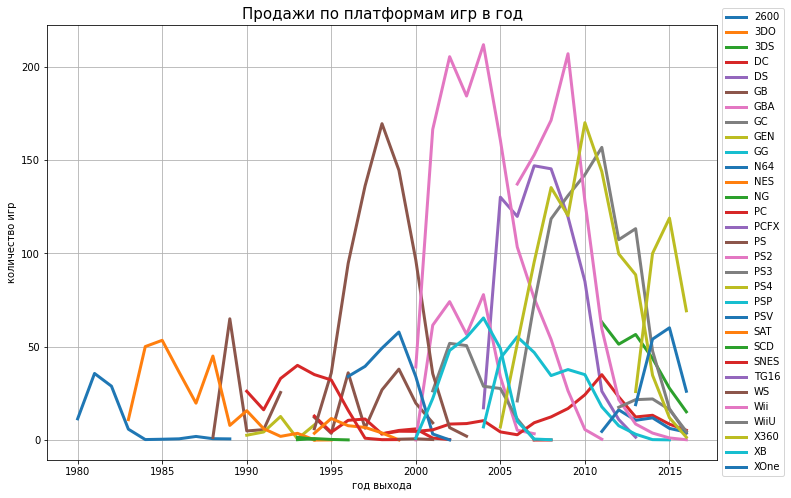

In [29]:
game_platform=(df.pivot_table(index ='year_of_release',
                     columns='platform',
                     values='sum_sales',
                     aggfunc='sum').
    plot(grid=True,
         linewidth=3,
         figsize=(12,8),
         legend=True))
game_platform.set(ylabel='количество игр',
       xlabel='год выхода')
game_platform.set_title('Продажи по платформам игр в год',fontsize=15)
plt.legend(bbox_to_anchor=(1,1.05))
plt.show;

По одному графику сложно судить,по этому выведем все платформы и количество  продаж.Составим датафрейм из топ 10

In [30]:
df_platform_top_10=df.groupby('platform')['sum_sales'].agg('sum').sort_values(ascending=False).head(10)
df_platform_top_10

platform
PS2     1233.56
X360     959.99
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sum_sales, dtype: float64

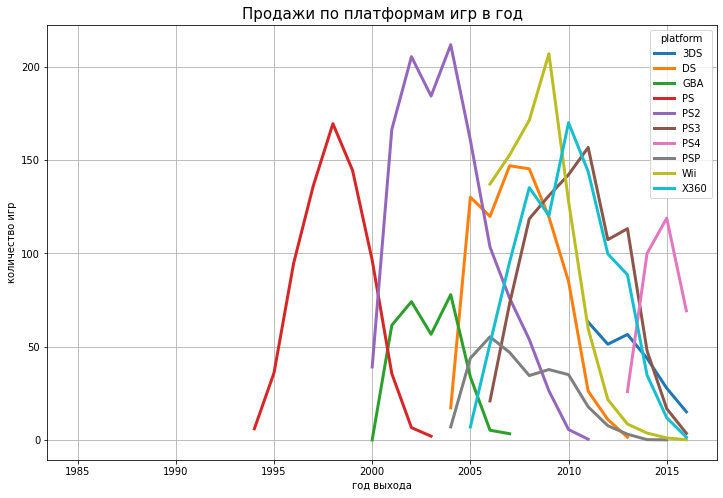

In [31]:
game_platform_top_10=(df.query('platform in @df_platform_top_10.index').
             pivot_table(index  ='year_of_release',
                         columns='platform',
                         values ='sum_sales',
                         aggfunc='sum').
    plot(grid=True,
         linewidth=3,
         figsize=(12,8),
         legend=True))
game_platform_top_10.set(ylabel='количество игр',
       xlabel='год выхода')
game_platform_top_10.set_title('Продажи по платформам игр в год',fontsize=15)
plt.show;

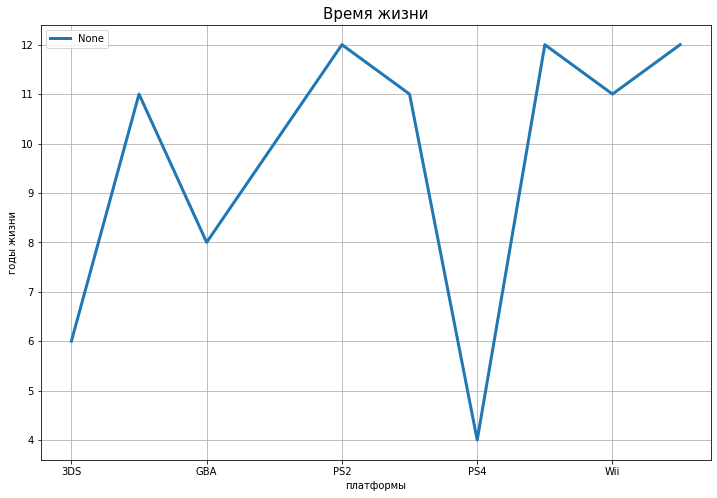

In [32]:
game_platform_top_10_age=(df.query('platform in @df_platform_top_10.index').
             pivot_table(index  ='year_of_release',
                         columns='platform',
                         values ='sum_sales',
                         aggfunc='sum').notna().sum().
         plot(grid=True,
         linewidth=3,
         figsize=(12,8),
         legend=True))
game_platform_top_10_age.set(ylabel='годы жизни',
       xlabel='платформы')
game_platform_top_10_age.set_title('Время жизни',fontsize=15)
plt.show;

In [33]:
(df.query('platform in @df_platform_top_10.index').
             pivot_table(index  ='year_of_release',
                         columns='platform',
                         values ='sum_sales',
                         aggfunc='sum')).notna().sum().sort_values(ascending=False)

platform
PS2     12
PSP     12
X360    12
DS      11
PS3     11
Wii     11
PS      10
GBA      8
3DS      6
PS4      4
dtype: int64

По графикам и рассчетам видно,что в среднем платформы живут по 10 -12 лет

Время жизни платформы PС отличается в 2 раза,это связано с тем,что PC более гибкая в плане железа,так как на нее выходят постянные обновление,и она считается универсальной,хотя есть и исключения в играх(Last of Us,God of War, Spider-man(немного заглянул в будущие**=D**) и т.д. так называемые **ЭКСКЛЮЗИВЫ**)Но в последнее время и эксклюзивы начали выходить на ПК,что еще раз подтверждает гибкость и универсальность платформы

Самая молодая платформа **PS4** -4 года

### Актуализация данных

Для акутального прогноза на 2017 год возьмем период за 4 года,так как это минимальное количество времени 1 платформы входящей в топ 10 нашего списка.Другие данные лишь исказят прогноз

In [34]:
actual_platforms= list(df.query('year_of_release == 2016')['platform'].unique())
# Отфильтруем данные
df_actual=df[df['year_of_release']>2012].query('platform in @actual_platforms')
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Актуальный период жизни плтаформы 10-12 лет

Так же искючены платформы которые более не актуальны на 2016 год

### Выбор потенциально прибыльных платформ

**Анализ выручки**

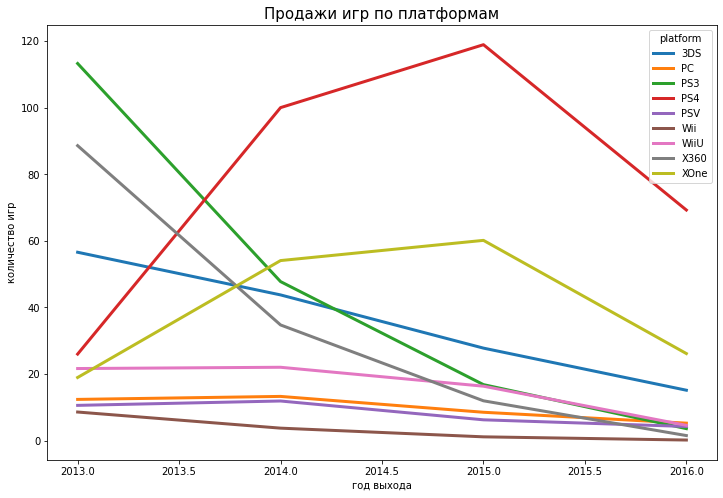

In [35]:
platform_cash=(df_actual.pivot_table(index='year_of_release', 
                          columns='platform', 
                          values ='sum_sales', 
                          aggfunc='sum').
            plot(linewidth=3, 
                 figsize  =(12,8)))
platform_cash.set(ylabel='количество игр',
       xlabel= 'год выхода')
platform_cash.set_title('Продажи игр по платформам', fontsize=15)
plt.show;

По данному графику видно:

**PS3** И **Х360** находятся уже в конце своего пути,опираться на них не стоит

Продажи **PC** И **PSV** не растут и не падают,но такая платформа как **PC** держится уже  26 лет,скорее всего ее успешность останется на прежнем уровне

**PS4** И **XOne** показали резкий рост с 2013 по 2015,в то время как предыидущие их версии начали падать,скорее всего это связано с переходом пользователей на новые версии платформ,а так же отличчное доверию этим 2 брендам (PlayStation & Xbox)

Продажи остальных платформ плавно падают,наиболее значительное паданеие из оставшихся наблюдается у **3DS**

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

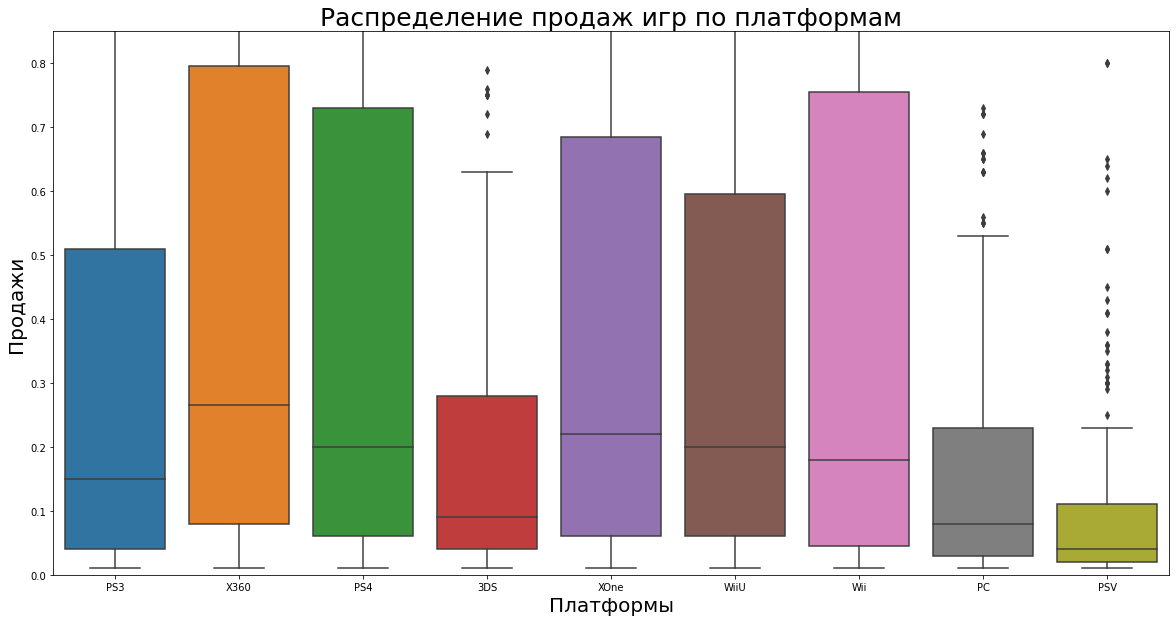

In [36]:
plt.figure(figsize=(20,10))
boxplot = sns.boxplot(data=df_actual,x='platform',y='sum_sales'
                     )
boxplot.axes.set_title("Распределение продаж игр по платформам",fontsize=25)
boxplot.set_xlabel("Платформы",fontsize=20)
boxplot.set_ylabel("Продажи",fontsize=20)

plt.ylim(0,0.85)
plt.show()

In [37]:
df_actual_pivot=df_actual.pivot_table(index='platform',values='sum_sales',aggfunc=['describe'])
df_actual_pivot

describe                                                      
              25%    50%    75%  count    max      mean   min       std
platform                                                               
3DS         0.040  0.090  0.280  303.0  14.60  0.472772  0.01  1.381347
PC          0.030  0.080  0.230  189.0   3.05  0.208624  0.01  0.352304
PS3         0.040  0.150  0.510  345.0  21.05  0.525884  0.01  1.451939
PS4         0.060  0.200  0.730  392.0  14.63  0.801378  0.01  1.609456
PSV         0.020  0.040  0.110  358.0   1.96  0.092151  0.01  0.153816
Wii         0.045  0.180  0.755   23.0   3.58  0.593913  0.01  0.915432
WiiU        0.060  0.200  0.595  115.0   7.09  0.562000  0.01  1.038778
X360        0.080  0.265  0.795  186.0  16.27  0.735484  0.01  1.663275
XOne        0.060  0.220  0.685  247.0   7.39  0.645020  0.01  1.036139

По ящику и расчетам видно что наиболее успешная это **Xbox**

**PS4** успешнее своего предшествинника **PS3**

**Х360** наоборот успешнее своего потомка **ХОne**

**PC** в отличии от приставок имеет меньшее распределение по продажам.Но считаю,что связано это с его универсальностью,так как игры для пк можно скачать на торентах,как и делают большинство пользователей,по этому  отнесем эту платформу к Успешным

**PSV** и **3DS**-Это 2 портативные приставки-соответственно железо на них слабее(меньше выбора игр),экран маленький(не всем пользователям нравится ограниченность,люди любят выбирать из большого и ощущать полную погруженность в игру)

**Вывод :**

Актуальными платформами на 2017 год можно считать PlayStation PC Xbox и Wii

Странно что для информации не представлены еще 2 платформы IOS и Android,ведь как мы помним мобильная индустрии игр развивается бешенными темпами

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

In [38]:
# напишем функцию для возврата усов
def moustache(col): 
    descr=col.describe()
    irq=(descr['75%']-descr['25%'])*1.5
    minimum=max(descr['25%']-irq,descr['min'])
    maximum=min(descr['75%']+irq,descr['max'])
    return minimum,maximum


In [39]:
#Выбор платформы
df_platform=df_actual[df_actual['platform']=='PS4']
#Обрезка
min_mus,max_mus=moustache(df_platform['sum_sales'])
df_platform=df_platform[(df_platform['sum_sales']>=min_mus)&(df_platform['sum_sales']<=max_mus)]
min_mus, max_mus = moustache(df_platform['user_score'])
df_platform = df_platform[(df_platform['user_score']>=min_mus)&(df_platform['user_score']<=max_mus)]
min_mus, max_mus = moustache(df_platform['critic_score'])
df_platform = df_platform[(df_platform['critic_score']>=min_mus)&(df_platform['critic_score']<=max_mus)]
print('Кореляции продажи отзывы пользователей:',df_platform['sum_sales'].corr(df_platform['user_score']))
print('Кореляции продажи отзывы критиков:',df_platform['sum_sales'].corr(df_platform['critic_score']))

Кореляции продажи отзывы пользователей: -0.0601815177061136
Кореляции продажи отзывы критиков: 0.22556285049379732


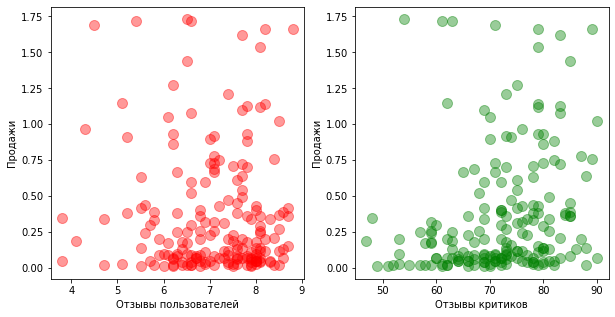

In [40]:
#Построение диаграмыы рассевивания
fig=plt.figure(figsize=(10,5))
ax_1=fig.add_subplot(1,2,1)
ax_1.scatter(x=df_platform['user_score'], 
             y=df_platform['sum_sales'],
             s=100,color='red',alpha=0.4)
ax_1.set_xlabel('Отзывы пользователей')
ax_1.set_ylabel('Продажи')
ax_2=fig.add_subplot(1,2,2)
ax_2.scatter(x=df_platform['critic_score'], 
             y=df_platform['sum_sales'],
             s=100,color='green',alpha=0.4)
ax_2.set(
       xlabel='Отзывы критиков',
       ylabel='Продажи')
plt.show()

По выбранной платформе **PS4** ,кореляция прослеживается очень слабая,построим такие же диаграммы только для всех платформ.Но отзыввов критиков значительно превышает отзывы пользователей

**Соотнесите выводы с продажами игр на других платформах**

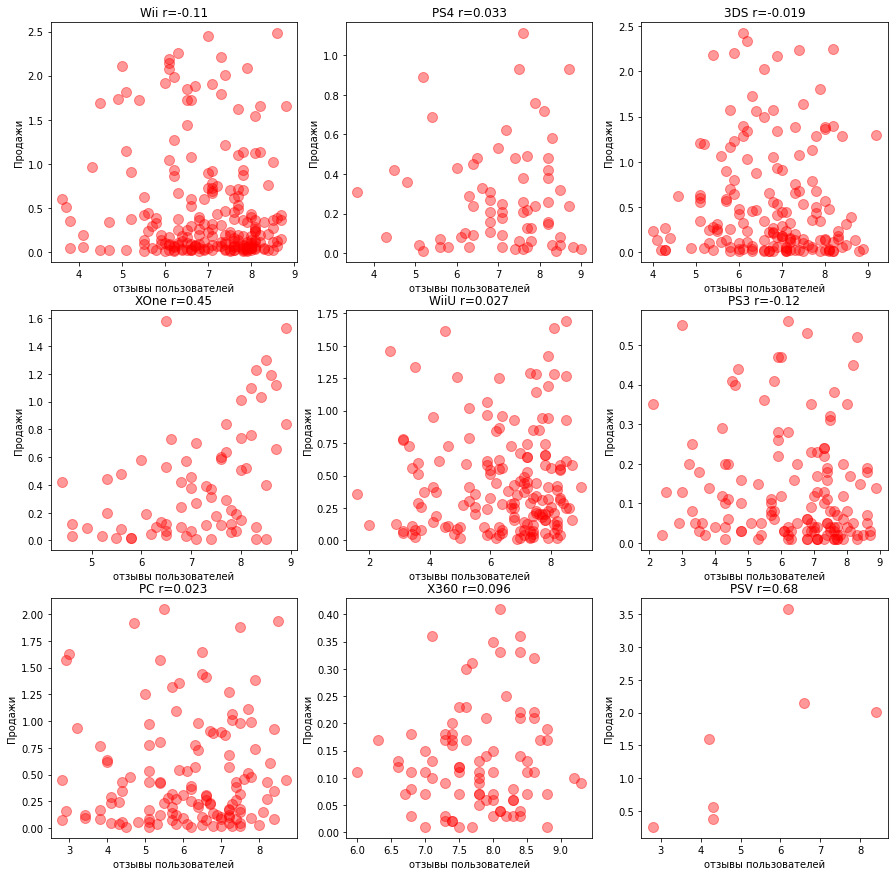

In [41]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,15))

n=0

for ax in axes.flat:
    # Выборка данных для очередной платформы
    i_df_platform=df_actual[df_actual['platform']==actual_platforms[n]]
    # Обрезка по усам
    min_mus,max_mus=moustache(i_df_platform['user_score'])
    i_df_platform=i_df_platform[(i_df_platform['user_score']>= min_mus)&(i_df_platform['user_score'] <= max_mus)]
    min_mus,max_mus=moustache(i_df_platform['sum_sales'])
    i_df_platform=i_df_platform[(i_df_platform['sum_sales']>=min_mus)&(i_df_platform['sum_sales'] <= max_mus)]
    # Расчёт кореляции
    r=i_df_platform['sum_sales'].corr(i_df_platform['user_score'])
    # Вывод графика
    ax.set(title=(f'{actual_platforms[n-1]} r={r:.2}'))
    ax.scatter(x=i_df_platform['user_score'],
               y=i_df_platform['sum_sales'],
               s=100,color='red',alpha=0.4)
    ax.set(ylabel='Продажи',xlabel='отзывы пользователей')
    n+=1

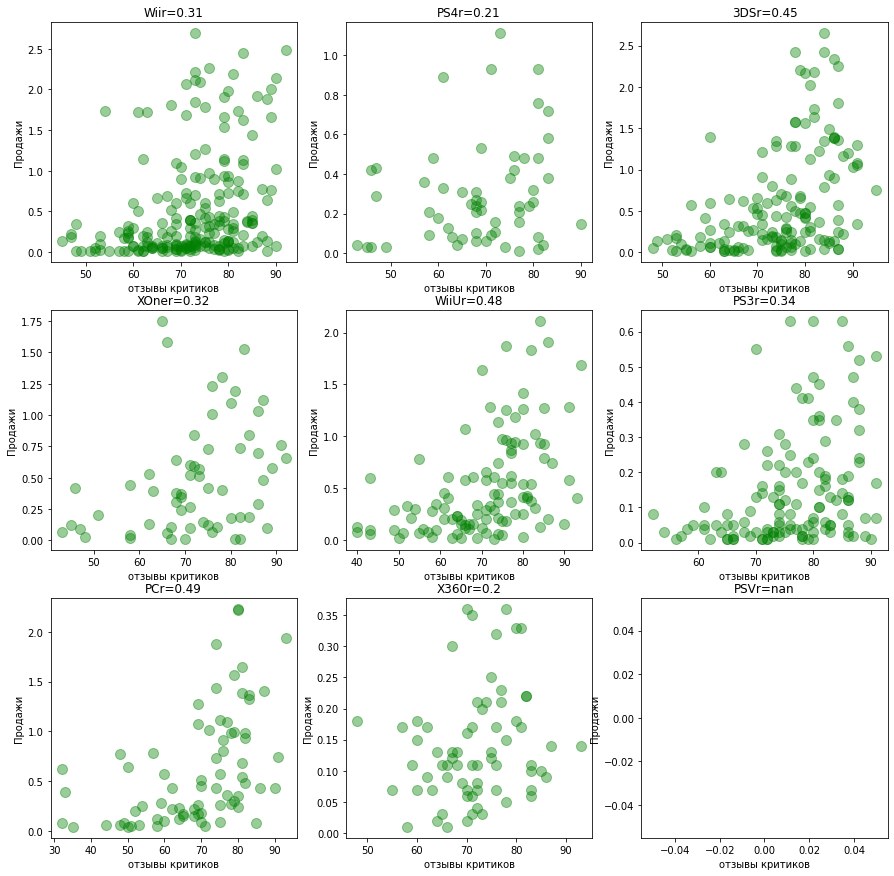

In [42]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,15))

n=0

for ax in axes.flat:
    # Выборка данных для очередной платформы
    i_df_platform=df_actual[df_actual['platform']==actual_platforms[n]]
    # Обрезка по усам
    min_mus,max_mus=moustache(i_df_platform['critic_score'])
    i_df_platform=i_df_platform[(i_df_platform['critic_score']>= min_mus)&(i_df_platform['user_score'] <= max_mus)]
    min_mus,max_mus=moustache(i_df_platform['sum_sales'])
    i_df_platform=i_df_platform[(i_df_platform['sum_sales']>=min_mus)&(i_df_platform['sum_sales'] <= max_mus)]
    # Расчёт кореляции
    r=i_df_platform['sum_sales'].corr(i_df_platform['critic_score'])
    # Вывод графика
    ax.set(title=(f'{actual_platforms[n-1]}r={r:.2}'))
    ax.scatter(x=i_df_platform['critic_score'],
               y=i_df_platform['sum_sales'],
               s=100,color='green',alpha=0.4)
    ax.set(ylabel='Продажи',xlabel='отзывы критиков')
    n+=1

*Вывод:*

Наблюдается,слабая линейная связь между оценками критиков и продажами,в свою очередь связь между продажами и отзывыми пользователей отсутвует

Я предпологаю,что не все пользователи покупавшие игры ставят оценки-это первое(исходя из личного опыта и опыта друзей,знакомых)

И второе -Для того что бы поставить оценки играм для начала ее следует купить,но кто будет покупать игру ради того,что бы поставить оценку?если она ему не нравится,и как мы помним игры для пк можно скачать торент,приставки прошлого поколения PS3 и Хbox360 поддавались прошивке

В то время как у критиков все должно быть задукоментировано и подтверждено,ведь они публичные лица,на их рецензии опираются люди

### Анализ распредиления играм по жанрам

In [43]:
df_genre=df_actual.pivot_table(index ='genre',values='name',aggfunc='count').sort_values(by='name',ascending=False)
df_genre=df_genre.merge(df.pivot_table(index = 'genre',values='sum_sales',aggfunc='sum'),on='genre')
df_genre['sales_games']=df_genre['sum_sales']/df_genre['name']
df_genre

,name,sum_sales,sales_games
genre,,,
Action,752,1716.52,2.282606
Role-Playing,285,931.08,3.266947
Adventure,211,233.33,1.105829
Sports,208,1309.66,6.296442
Shooter,187,1041.36,5.568770
Misc,146,790.29,5.412945
Racing,85,722.16,8.496000
Fighting,79,442.66,5.603291
Platform,72,825.55,11.465972


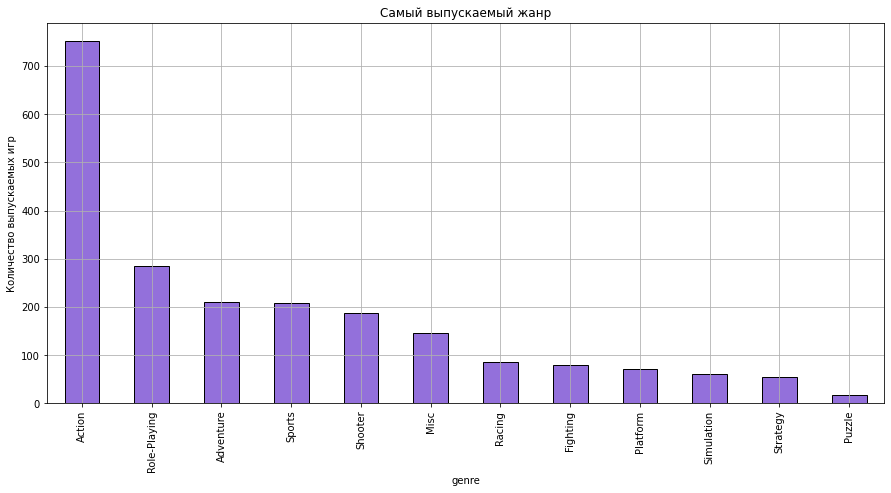

In [44]:
df_genre=df_actual.groupby('genre')['sum_sales'].count().sort_values(ascending=False)
df_genre.plot(
                y='genre',grid=True,
                figsize=(15,7),kind='bar',
                color='MediumPurple',ec='black',title='Самый выпускаемый жанр')
plt.ylabel('Количество выпускаемых игр')
plt.show()

Самые выпускаемые жанры **Action, RP, Adventure, Sport, Shooter**

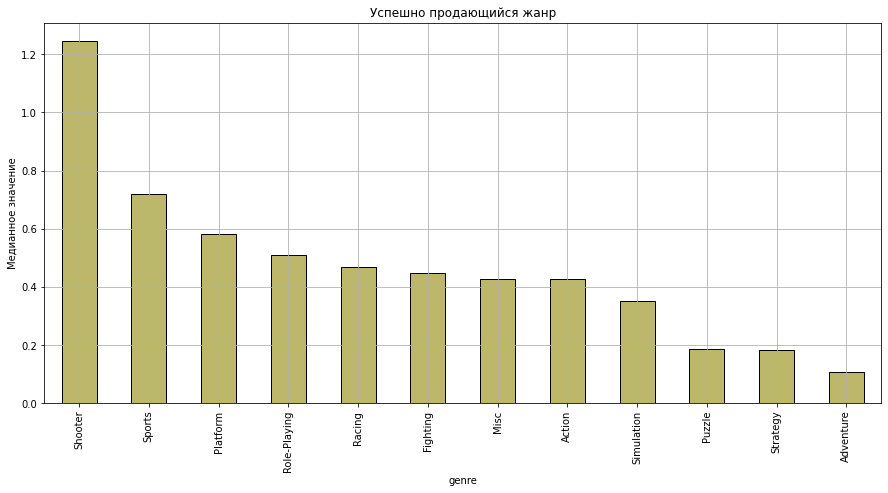

In [45]:
df_genre=df_actual.groupby('genre')['sum_sales'].mean().sort_values(ascending=False)
df_genre.plot(
                y='genre',grid=True,
                figsize=(15,7),kind='bar',
                color='DarkKhaki',ec='black',title='Успешно продающийся жанр')
plt.ylabel('Медианное значение')
plt.show()

Самые усешно продоваемые жанры **Shooter, Sports, Platform, Rp, Racing**

**Вывод**

Начиная с 2000 года до 2015 был резкий всплеск в индустрии игр,что породило огромную конкуренцию,после 2015 года слабые компании начали уходить с рынка,что сократило количество их выпуска,но увеличело качество продукта

В среднем игровые платформы живут по 10-12 лет,но есть исключению в виде **PC** платформы,самой молодой является **PS4**,а так же ее можно отнести к самой перспективной рядом рассположилась **XOne** .Но следует помнить об отсувии **android** & **ios** .Исходя из представленных данных приоритетную выберем **PS4**

Самые выпускаемые жанры **Action, RP, Adventure, Sport, Shooter**

Самые усешно продоваемые жанры **Shooter, Sports, Platform, Rp, Racing**

## Шаг. Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP)

**Популярность платофрм по регионам**

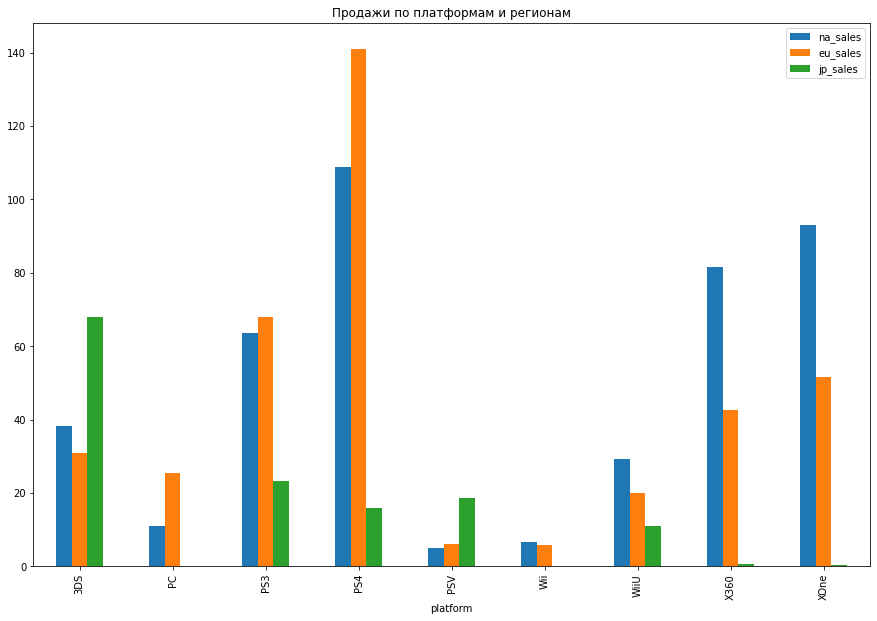

In [46]:
df_region_platform=df_actual.pivot_table(index ='platform',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
df_region_platform=df_region_platform.reindex(columns=['na_sales','eu_sales','jp_sales'])
df_region_platform.plot(kind='bar',figsize=(15,10),title='Продажи по платформам и регионам');

В разных регионах популярны разные платформы 

В Европе и Северной Америке отдают предпочтения **Playstation** и **Xbox**

Но все же Американцы отдают предпочтение серии **Xbox**

Япония выделяется **Nintendo** и **PSV**,предполагаю что так как Японцы являтся самой работающей нацией,время на игры они тратят меньше,а портативные приставки можно использовать когда едешь в метро на работу и после нее.Ведь на то они и портативные

**Построим отдельно для каждого региона графики** что бы убедиться в выводе

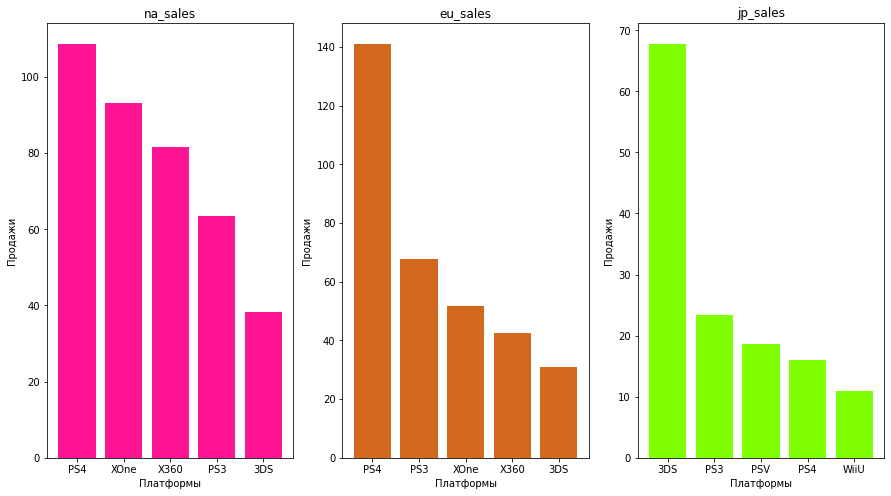

In [47]:
fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15,8))

n=0
colors=['DeepPink','Chocolate','Chartreuse']
for ax in axes:
    i_df =df_region_platform[df_region_platform.columns[n]].sort_values(ascending=False).head()
    ax.bar(i_df.index,i_df, color=colors[n])
    ax.set(title=(df_region_platform.columns[n]),ylabel='Продажи',xlabel='Платформы') 
    n+=1

Построенные графики для каждого региона совпдают с общим графиком

Топ 5 платформ для северной америки **PS4 XOne X360 PS3 3DS**

Топ 5 платформ для Европы **PS4 PS3 XOne X360 3DS**

Топ 5 платформ для Японии **3DS PS3 PSV PS4 WiiU**

**Популярность платофрм по жанрам**

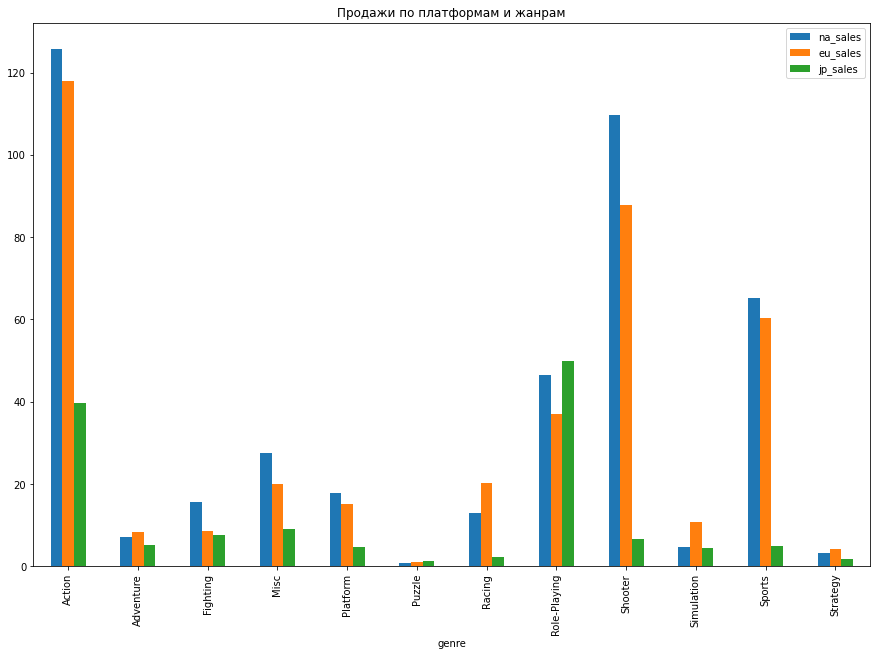

In [48]:
df_region_genre=df_actual.pivot_table(index ='genre',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
df_region_genre=df_region_genre.reindex(columns=['na_sales','eu_sales','jp_sales'])
df_region_genre.plot(kind='bar',figsize=(15,10),title='Продажи по платформам и жанрам');

На грфике видно что в каждом регионе популярен свой жанр

Северная Америка и Европа предпочитают **Action, Shooter, Sports**

Япония отдает предпочтения **RPG, Action**

**Построим отдельно для каждого региона графики** что бы убедиться в выводе

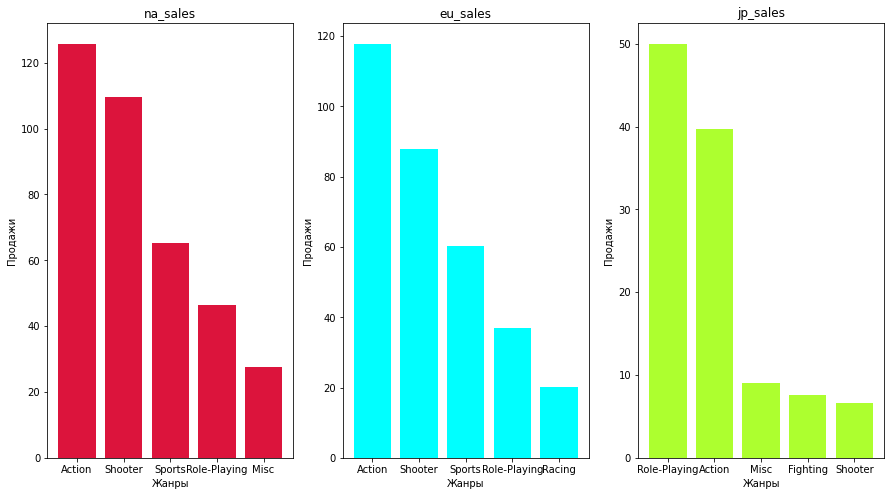

In [49]:
fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15,8))

n=0
colors=['Crimson','Cyan','GreenYellow']
for ax in axes:
    i_df =df_region_genre[df_region_genre.columns[n]].sort_values(ascending=False).head()
    ax.bar(i_df.index,i_df, color=colors[n])
    ax.set(title=(df_region_genre.columns[n]),ylabel='Продажи',xlabel='Жанры') 
    n+=1

Топ 5 жанров для Cеверной Америки **Action, Shooter,Sports, RPG, Misc**

Топ 5 жанров для Европы  **Action, Shooter, Sports, RPG, Racing**

Топ 5 жанров для Японии **RPG, Action, Misc, Fighting, Shooter**

Первые 4 позиции в Европе и Америке идентичны,5ая отличается-европейцы лучше поиграют в гонки чем в другие игры

В Японии жанры кардинално другие,это связано с выбором платформы

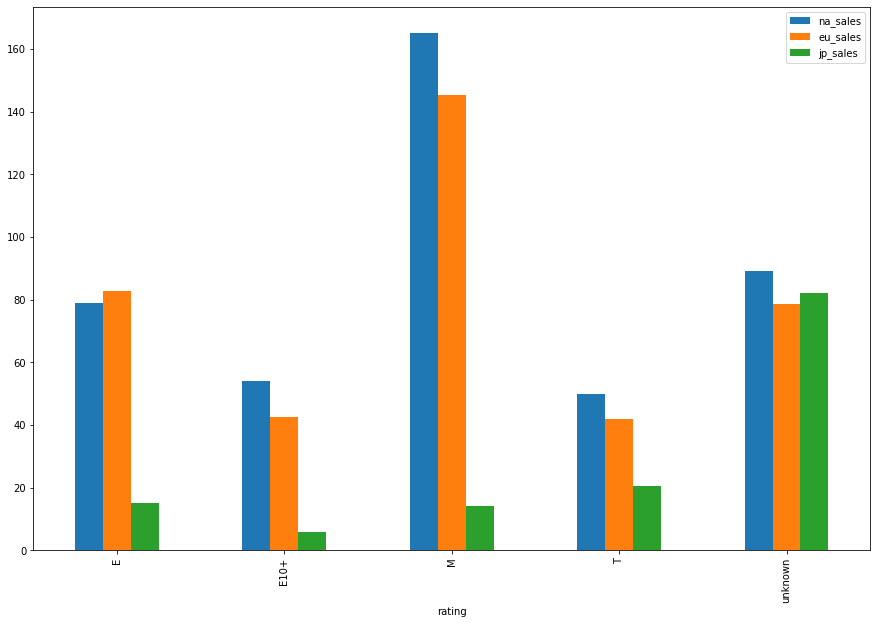

In [50]:
df_region_rating=df_actual.pivot_table(index ='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
df_region_rating=df_region_rating.reindex(columns=['na_sales','eu_sales','jp_sales'])
df_region_rating.plot(kind='bar',figsize=(15,10));

**Определение Абревиатур**

**М** - **Mature**- Материал для взрослых,то есть не подходит лицам младше 17 лет

**T**- **Teen**- Материал для подростков от  13 лет и старше

**E10+** - **Everyone 10 and older** - Материал подходит для всех от 10 лет и старше

**E** - **Everyone** - Материал подходит для всех

**Unknown** - **Unkown** - Неизвестный ретинг игры

Сложно что то говорить из данног графика,построим по долям продажи в каждом регионе но для начала расччитаем ее

In [51]:
df_region_rating['na_percent']=df_region_rating['na_sales']/df_region_rating['na_sales'].sum()
df_region_rating['eu_percent']=df_region_rating['eu_sales']/df_region_rating['eu_sales'].sum()
df_region_rating['jp_percent']=df_region_rating['jp_sales']/df_region_rating['jp_sales'].sum()
df_region_rating

,na_sales,eu_sales,jp_sales,na_percent,eu_percent,jp_percent
rating,,,,,,
E,78.94,82.80,15.00,0.180583,0.211651,0.109099
E10+,54.02,42.53,5.89,0.123576,0.108714,0.042839
M,165.21,145.32,14.11,0.377934,0.371463,0.102626
T,49.79,41.95,20.44,0.113899,0.107231,0.148665
unknown,89.18,78.61,82.05,0.204008,0.200941,0.596771


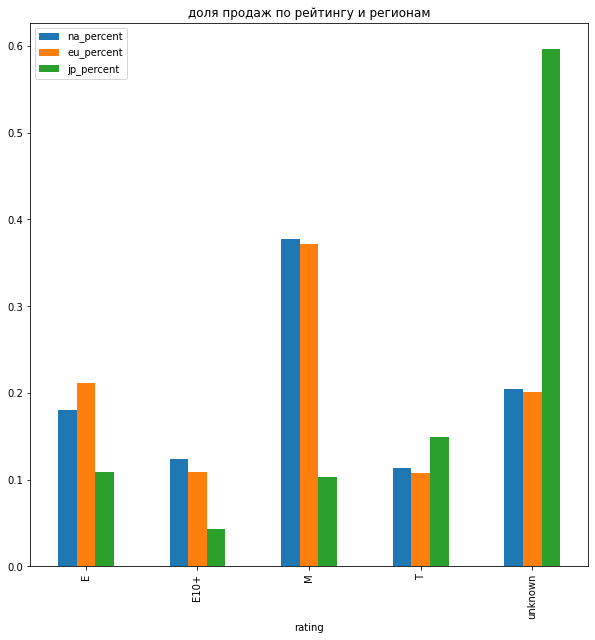

In [52]:
(df_region_rating[['na_percent','eu_percent','jp_percent']].
                                                            plot(
                                                                kind='bar',
                                                                figsize=(10,10),
                                                                title='доля продаж по рейтингу и регионам'));

По графику можно сказать,что по рейтингу ERSB(Для Америки и Канады)

Американцы и Европейцы предпочитают игры жанра M & E

Японцы же в свою очередь отдают предпочтения неизвестным игровым жанрам.Не определенность жанра связана с тем что у них своя ассоциация жанра **CERO**,а наш датафрейм представлен ассоциацией **ERSB**

Так же и в европе своя ассоциация **PEGI**.Но основной массив игр выпускают Американские студии,по этому и рейтинг выдает американская ассоциация

Так же нужно помнить,что в Японии спросом пользуютс другие платформы **Nintendo** и **PSV**,следовательно там другие студии(которым скорее всего и выдает рейтинг ассоциации Японии)

**Вывод**

По предпочтениям в выборе платформах и жанрах Европейцы,Американц и жители Канады -схожи

По рейтингу игры эти Европейцы,Американц и жители Канады-тоже схожи,но стоить помнить,что европейские разроботчики игр не относятся к **ERSB**. Для них есть своя ассоциация,возможно там будут другие показатели

Японцы сильно отличаются и в выборе платформ,жанров и выдаче рейтинга-все эти звенья взаимосвязанны,по этому получились такие результаты

## Шаг. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Применем односторнию гипотезу к выборка

Сформулируем гипотезы

H0 Средние пользовательские рейтинги платформ Xbox One и PC **равны**

H1 Средние пользовательские рейтинги платформ Xbox One и PC **различаются**

Что бы лучше представить картину построим дополнительно гистограмы

In [53]:
df_xone= df_actual[df_actual['platform']=='XOne'].dropna()
df_pc=df_actual[df_actual['platform']=='PC'].dropna()

Оценки ползователей платформы PC: 6.3020267
Оценки ползователей платформы Xbox_One: 6.5381823


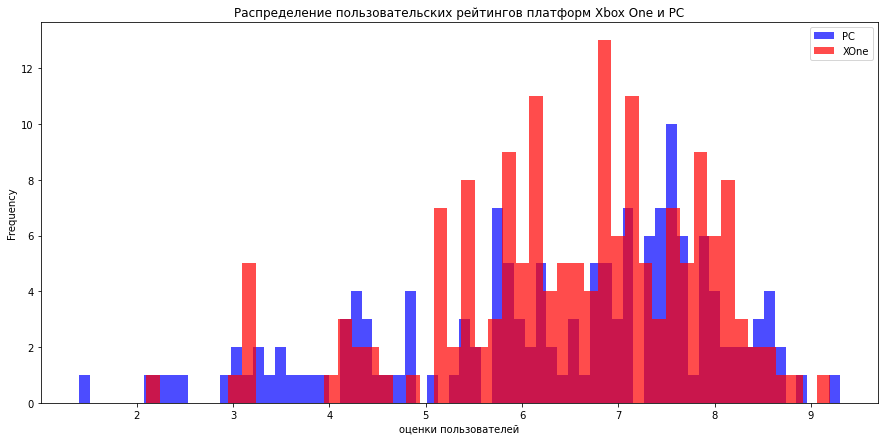

In [54]:
ax=df_pc.plot(y='user_score',kind ='hist',color='blue',alpha=0.7,label='PC',bins =70)
ax.set_xlabel('оценки пользователей')
(df_xone.plot(y='user_score',ax=ax,kind='hist',color='red',alpha=0.7,label='XOne',bins=50,figsize=(15,7),
        title  ='Распределение пользовательских рейтингов платформ Xbox One и PC'));
print('Оценки ползователей платформы PC:',df_pc['user_score'].mean())
print('Оценки ползователей платформы Xbox_One:',df_xone['user_score'].mean())

Пороговое значение возьмем в 5%-по общепринятым стандартам

In [55]:
alpha=.05
results = st.ttest_ind(df_xone['user_score'],
                       df_pc['user_score'],
                       equal_var = False)
print('p-значение:',results.pvalue)
if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.17882517015736454
Не получилось отвергнуть нулевую гипотезу


*Вывод*

Средние пользовательские рейтинги платформ Xbox One и PC равны

### Средние пользовательские рейтинги жанров Action и Sports  разные

Повторим действия из предыдущего шага 

H0 Средние пользовательские рейтинги жанров Action и Sports **равны**

H1 Средние пользовательские рейтинги жанров Action и Sports **различаются**

Что бы лучше представить картину построим дополнительно гистограм

In [56]:
df_action= df_actual[df_actual['genre']=='Action'].dropna()
df_sports=df_actual[df_actual['genre']=='Sports'].dropna()

Оценки ползователей платформы Action: 6.9362454
Оценки ползователей платформы Sports: 5.6654553


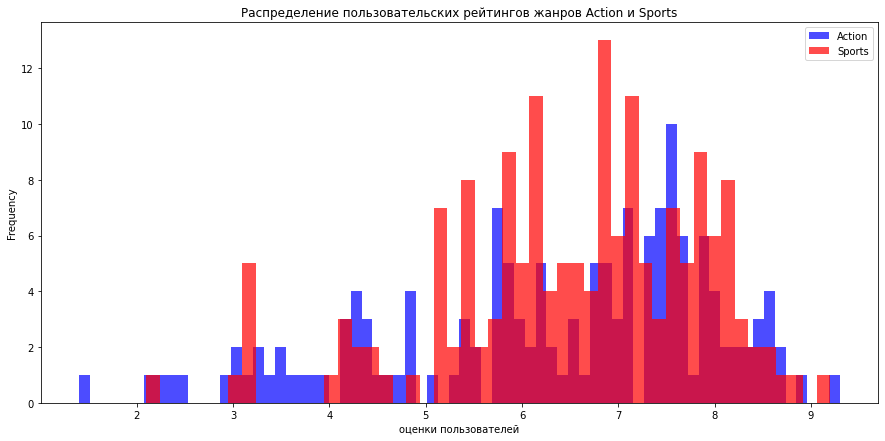

In [57]:
ax=df_pc.plot(y='user_score',kind ='hist',color='blue',alpha=0.7,label='Action',bins =70)
ax.set_xlabel('оценки пользователей')
(df_xone.plot(y='user_score',ax=ax,kind='hist',color='red',alpha=0.7,label='Sports',bins=50,figsize=(15,7),
        title  ='Распределение пользовательских рейтингов жанров Action и Sports'));
print('Оценки ползователей платформы Action:',df_action['user_score'].mean())
print('Оценки ползователей платформы Sports:',df_sports['user_score'].mean())

In [58]:
alpha=.05
results = st.ttest_ind(df_action['user_score'],
                       df_sports['user_score'],
                       equal_var = False)
print('p-значение:',1-results.pvalue)
if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.999999999999895
Отвергаем нулевую гипотезу


*Вывод*

Средние пользовательские рейтинги жанров Action и Sports **различаются**

## Шаг. Общий вывод

Для изучения датафрейма были использованы 6 библиотек

В ходе первого шага была просмотрена общая информация о нем и составлено описание предоставленных данных

В ходе второго шага все столбцы датафреймы приведены к нижнему регистру

Были изменены типы данных в **year_realse_date**,**user_score**

В **user_score**-был заполнен таким значением как **TBD**-что означает еще не определено,соответсвенно **TBD** был заполнен значением **NaN**

Данные в **year_of_release** - были удалены,так как 269 строк,никак не повлияли на наше иследование

**critic_score, user_score**-Трогать не будем,так как потеряем большой объем  данных,ну заполнить их нечем.Так как это идивидуальные оценки критиков и пользователей,мы не можем заполнять их ни медианным ни средним - это исказит наш прогноз

**rating** - заполним значением **unknown**,в ходе иследование было установлено,что прпоуски в этих значениях связаны организацие которая,выставляет рейтинг игры,в Японии этим занимается другая организация,а значительная часть прпусков находятся в японском сегменте

А также произеведен расчет суммарных продаж по всем регионам,данный столбец добавлен в датафрейм

В ходе иследовательского анализа был установлен следующий вывод(шаг3):

Начиная с 2000 года до 2015 был резкий всплеск в индустрии игр,что породило огромную конкуренцию,после 2015 года слабые компании начали уходить с рынка,что сократило количество их выпуска,но увеличело качество продукта

В среднем игровые платформы живут по 10-12 лет,но есть исключению в виде **PC** платформы,самой молодой является **PS4**,а так же ее можно отнести к самой перспективной рядом рассположилась **XOne** .Но следует помнить об отсувии **android** & **ios** .Исходя из представленных данных приоритетную выберем **PS4**

Самые выпускаемые жанры **Action, RP, Adventure, Sport, Shooter**

Самые усешно продоваемые жанры **Shooter, Sports, Platform, Rp, Racing**

В шаге номер 4 был составлен портет пользователя каждого региона

**Европейцы**

    Отдают предпочтения **PlayStation**
    Топ 5 платформ для Европы PS4 PS3 XOne X360 3DS
    Топ 5 жанров для Европы Action, Shooter, Sports, RPG, Racing
    Ретинг игр в европе совпдает с выбором рейтинга игр жителей северной америки
    
**Жители северной Америки**

    отдают предпочтение серии Xbox
    Топ 5 платформ для северной америки PS4 XOne X360 PS3 3DS
    Топ 5 жанров для Cеверной Америки Action, Shooter,Sports, RPG, Misc
    Ретинг игр в северной америки совпдает с выбором рейтинга игр с европейским выбором
    
**Японцы**

    Отдают предпочтения Nintendo и PSV-скорее всего их выбор связан в связи с их трудолюбием и отсутвием большого    свободного времени
    Топ 5 платформ для Японии 3DS PS3 PSV PS4 WiiU
    Топ 5 жанров для Японии RPG, Action, Misc, Fighting, Shooter
    Игорвой рейтинг в японии преобладает неизвестным значением,так как платформы и жанры у них отличаются,скорее всего большинство жителей японии выбирают местных разроботчиков игр,которые не входят не в сервероамериканскую ассоциацию рейтинга ERSB ни в европейскую PEGI,японская игровая индустрия получает рейтинг от своей ассоциации СERO
    
В шаге номер 5 были проверены 2 гипотезы и так же построена визуализация для лучшего понимания картины

    пороговое значение =5%

Гипотеза номер один подтвердилась

    p-значение: 0.17882517015736454
    Средние пользовательские рейтинги платформ Xbox One и PC равны
    
Гипотеза номер один была отвергнута

    p-значение: 0.999999999999895
    Средние пользовательские рейтинги жанров Action и Sports различаются

Рекомендации магазину **Cтримчик**

В целом рекомендую основной упор сделать на стационарные платформы,такие как **PS** & **XOne**,в любом случаем продажи игры последние годы находятся в тенденции спада.Скорее всего это связано с развитием интернет-магазинов у самих производителей стационарных платформ!

**PlayStation**===> PlastationStore

**Xbox**===> MicrosoftStore

Это огромные корпорации,с колоссальным бюджетом,тягаться с ними в продажах очень тяжело,тратить бюджет на уже "мертвые платформы не стоит" -это только усугубит положение,рекомендую обратиться к специалстам по маркетингу,дабы они придумали промо-акции,если перекупить пользователей чистыми продажами не получается,то нужно придумать выгодное предложение например игра+джойстик в подарок,или подписка на сервисы в подарок.

Так же предполагаю отток пользователй в связи с развитием мобильной индустрии,но там тоже заняли места 2 гиганта

**IOS**===>AppStore

**GooglePlay**===>Android

Как бороться с ними не известно,нет данных,что бы составить хотя бы приблизительную картину

Я понимаю,что мой прогноз не вызывает перспективных эмоций,но зато он честный!Лучше знать,что дела обстоят плохи и во время применить нужные меры.Чем слепо рыспылять бюджет,туда куда не нужно!Главное не падать духом,стараться и делать!

Сделайте упор на европейскую и северомаериканскую аудиторию с жанром **Shooter** в комбинации с какой нибудь акцией я уверен,что прирост будетявно не меньше чем в предыдущих годах!